### Importación de datos



In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



En este primer análisis, debes calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.

In [4]:
resultado_fac_t1= tienda.Precio.sum ()

print (f"${resultado_fac_t1:,.2f}")

$1,150,880,400.00


In [5]:
resultado_fac_t2= tienda2.Precio.sum ()

print (f"${resultado_fac_t2:,.2f}")

$1,116,343,500.00


In [6]:
resultado_fac_t3= tienda3.Precio.sum ()

print (f"${resultado_fac_t3:,.2f}")

$1,098,019,600.00


In [7]:
resultado_fac_t4= tienda4.Precio.sum ()

print (f"${resultado_fac_t4:,.2f}")

$1,038,375,700.00


In [8]:
import pandas as pd
from tabulate import tabulate
datos = {
    'Tiendas': ['Tienda 1', 'Tienda 2', 'Tienda 3', "Tienda 4"],
    'Facturado': [resultado_fac_t1, resultado_fac_t2, resultado_fac_t3, resultado_fac_t4]
    }

df = pd.DataFrame(datos)

encabezados = ["Tienda", "Facturación"]

print(tabulate(
    df,
    headers=encabezados,
    floatfmt=",.2f",
    tablefmt="fancy_grid"
))




╒════╤══════════╤══════════════════╕
│    │ Tienda   │      Facturación │
╞════╪══════════╪══════════════════╡
│  0 │ Tienda 1 │ 1,150,880,400.00 │
├────┼──────────┼──────────────────┤
│  1 │ Tienda 2 │ 1,116,343,500.00 │
├────┼──────────┼──────────────────┤
│  2 │ Tienda 3 │ 1,098,019,600.00 │
├────┼──────────┼──────────────────┤
│  3 │ Tienda 4 │ 1,038,375,700.00 │
╘════╧══════════╧══════════════════╛


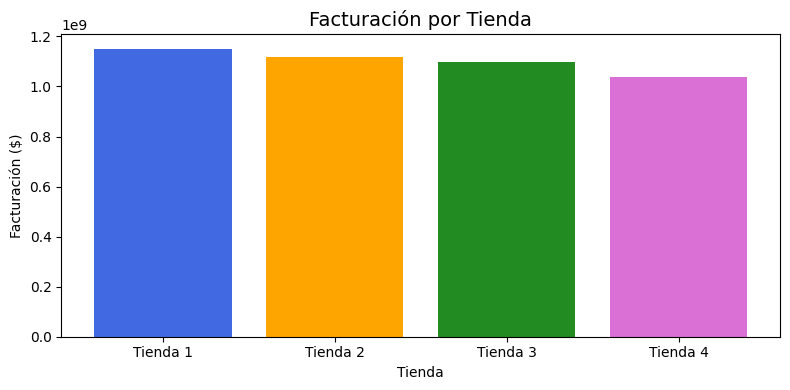

In [9]:
import matplotlib.pyplot as plt

colores = ['royalblue','orange','forestgreen','orchid',
           ]

plt.figure(figsize=(8,4))

plt.bar(
    df["Tiendas"],
    df["Facturado"],
    color=colores
)

plt.title("Facturación por Tienda", fontsize=14)
plt.xlabel("Tienda")
plt.ylabel("Facturación ($)")

plt.tight_layout()
plt.show()



# 2. Ventas por categoría

En este debes calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

In [10]:
import pandas as pd

# Lista de DataFrames
tiendas_df = [tienda, tienda2, tienda3, tienda4]

# Lista para almacenar los resultados
datos = []

for idx, tienda in enumerate(tiendas_df, start=1):
    resultado = tienda["Categoría del Producto"].value_counts()
    for categoria, cantidad in resultado.items():
        datos.append({
            "Tienda": f"Tienda{idx}",
            "Categoría del Producto": categoria,
            "Cantidad": cantidad
        })

# Crear el DataFrame final
tabla = pd.DataFrame(datos)

print(tabla)


     Tienda   Categoría del Producto  Cantidad
0   Tienda1                  Muebles       465
1   Tienda1             Electrónicos       448
2   Tienda1                 Juguetes       324
3   Tienda1        Electrodomésticos       312
4   Tienda1     Deportes y diversión       284
5   Tienda1   Instrumentos musicales       182
6   Tienda1                   Libros       173
7   Tienda1  Artículos para el hogar       171
8   Tienda2                  Muebles       442
9   Tienda2             Electrónicos       422
10  Tienda2                 Juguetes       313
11  Tienda2        Electrodomésticos       305
12  Tienda2     Deportes y diversión       275
13  Tienda2   Instrumentos musicales       224
14  Tienda2                   Libros       197
15  Tienda2  Artículos para el hogar       181
16  Tienda3                  Muebles       499
17  Tienda3             Electrónicos       451
18  Tienda3                 Juguetes       315
19  Tienda3        Electrodomésticos       278
20  Tienda3  

# 3. Calificación promedio de la tienda


En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

In [11]:
promedios = {
    "Tienda 1": tienda["Calificación"].mean(),
    "Tienda 2": tienda2["Calificación"].mean(),
    "Tienda 3": tienda3["Calificación"].mean(),
    "Tienda 4": tienda4["Calificación"].mean()
    }
satisfaccion_df = pd.DataFrame(
    list(promedios.items()), columns=["Tienda", "Calificación Promedio"]
    )
satisfaccion_df.style.format({
    "Calificación Promedio": "{:,.2f}"
})

,Tienda,Calificación Promedio
0,Tienda 1,4.00
1,Tienda 2,4.04
2,Tienda 3,4.05
3,Tienda 4,4.00


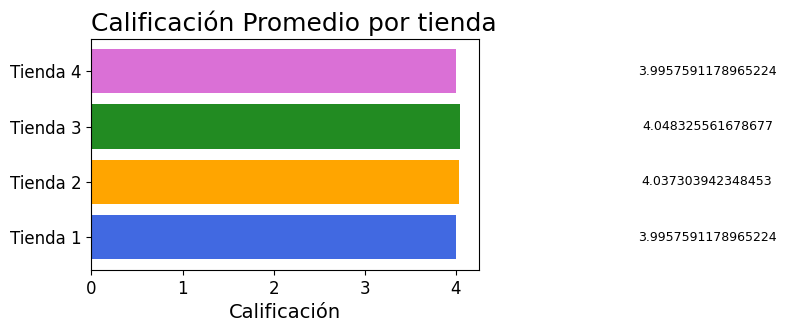

In [12]:
colores = ['royalblue','orange','forestgreen','orchid']

fig, ax = plt.subplots(figsize=(5,3))

ax.barh(satisfaccion_df['Tienda'], satisfaccion_df['Calificación Promedio'],color=colores)
ax.set_title('Calificación Promedio por tienda',
             loc='left',fontsize=18)
ax.set_ylabel('')
ax.set_xlabel('Calificación', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

for i,j in enumerate(satisfaccion_df['Calificación Promedio']):
  ax.text(j+2,i,str(j),color='black',fontsize=9,ha='left',va='center')


plt.show()


# 4. Productos más y menos vendidos

En este paso, debes identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

In [13]:
tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

resumen = []

for nombre, df in tiendas.items():
    ventas = (
        df.groupby("Producto")["Precio"]
        .sum()
        .reset_index()
    )

    mas_vendido = ventas.loc[ventas["Precio"].idxmax()]
    menos_vendido = ventas.loc[ventas["Precio"].idxmin()]

    resumen.append([
        nombre,
        mas_vendido["Producto"],
        mas_vendido["Precio"],
        menos_vendido["Producto"],
        menos_vendido["Precio"]
    ])
resumen_df = pd.DataFrame(
    resumen,
    columns=[
        "Tienda",
        "Producto Más Vendido",
        "Ventas Más Vendido",
        "Producto Menos Vendido",
        "Ventas Menos Vendido"
    ]
)

resumen_df.style.format({
    "Ventas Más Vendido": "{:,.2f}",
    "Ventas Menos Vendido": "{:,.2f}"
})


,Tienda,Producto Más Vendido,Ventas Más Vendido,Producto Menos Vendido,Ventas Menos Vendido
0,Tienda 1,Iphone 15,"96,697,500.00",Cuerda para saltar,"704,800.00"
1,Tienda 2,Iphone 15,"113,225,800.00",Cubo mágico 8x8,"643,600.00"
2,Tienda 3,Refrigerador,"99,889,700.00",Cubo mágico 8x8,"640,400.00"
3,Tienda 4,Iphone 15,"96,697,500.00",Cuerda para saltar,"704,800.00"


# 5. Envío promedio por tienda

En este paso, debes calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.  Sabiendo que el cliente paga el envío.

In [14]:
promedios_envio = {
    "Tienda 1": tienda["Costo de envío"].sum(),
    "Tienda 2": tienda2["Costo de envío"].sum(),
    "Tienda 3": tienda3["Costo de envío"].sum(),
    "Tienda 4": tienda4["Costo de envío"].sum()
}

envio_df = pd.DataFrame(
    list(promedios_envio.items()),
    columns=["Tienda", "Costo de envío Promedio"]
)

envio_df.style.format({
    "Costo de envío Promedio": "{:,.2f}"
})




,Tienda,Costo de envío Promedio
0,Tienda 1,"55,317,400.00"
1,Tienda 2,"59,485,100.00"
2,Tienda 3,"58,516,600.00"
3,Tienda 4,"55,317,400.00"


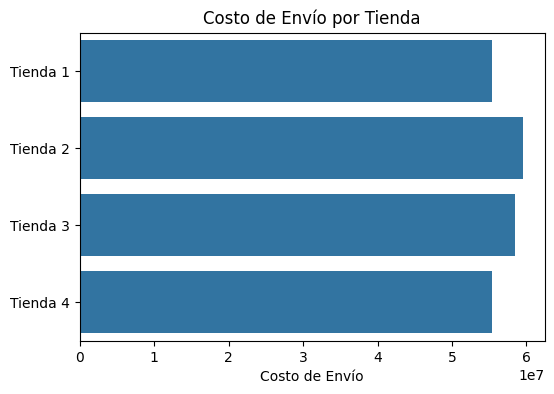

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

colores = ['royalblue','orange','forestgreen','orchid']
plt.figure(figsize=(6,4))

sns.barplot(
    data=envio_df,
    x="Costo de envío Promedio",
    y="Tienda",
    orient="h",


)

plt.title("Costo de Envío por Tienda")
plt.xlabel("Costo de Envío")
plt.ylabel("")


plt.show()


# Informe

En un contexto comercial cada vez más competitivo, la toma de decisiones basada en datos se vuelve fundamental para optimizar resultados y reducir riesgos. Este análisis se centra en el estudio del desempeño de cuatro tiendas, utilizando información real de ventas, calificaciones de clientes y costos de envío. A partir de estos datos, se busca comprender cómo se comporta cada tienda no solo en términos de facturación, sino también en la percepción del cliente y los costos asociados a la operación.

El análisis permite transformar datos dispersos en información clara y estructurada, facilitando la comparación entre tiendas y proporcionando una visión objetiva del rendimiento de cada una.

# Análisis de rendimiento

En términos generales, se observa que, de las cuatro tiendas que posee el señor Juan, la Tienda 4 es la que presenta la menor facturación. Si bien esta tienda registra un volumen de ventas relevante, su nivel de facturación es considerablemente inferior al de la Tienda 1 y la Tienda 2.

Esta diferencia podría estar asociada a diversos factores. Por ejemplo, aunque la Tienda 4 comercializa los mismos artículos que la Tienda 1, la facturación sigue siendo menor, lo que sugiere que el problema no radica únicamente en el portafolio de productos. Esto podría indicar la necesidad de un conocimiento más profundo del perfil y las preferencias de los clientes que frecuentan esta tienda.

Asimismo, resulta pertinente revisar el desempeño de las demás categorías de productos, con el fin de evaluar cuáles se encuentran realmente alineadas con las necesidades y expectativas de los clientes de la Tienda 4.

En este contexto, se sugiere realizar una investigación del mercado objetivo de esta tienda, que permita identificar sus principales fortalezas y áreas de mejora. A partir de estos hallazgos, se podrán definir acciones correctivas orientadas a mejorar su desempeño comercial y su facturación.

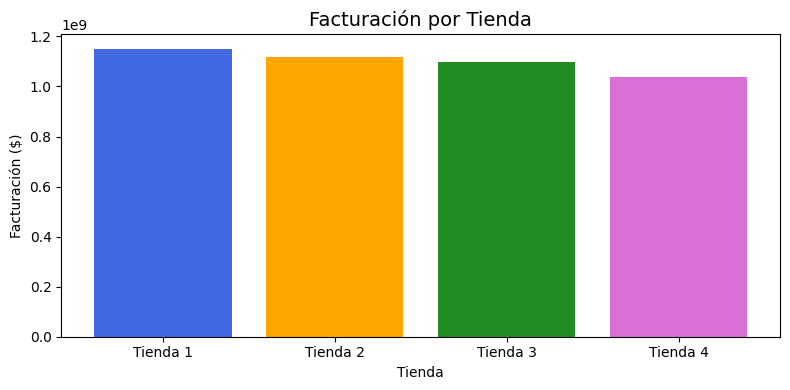

Asimismo, como se puede observar en los resultados obtenidos del análisis de ventas por categoría, existen productos en la Tienda 4 que registran mayores ventas que los mismos productos en la Tienda 1. Este comportamiento indica que, a pesar de presentar una menor facturación total, la Tienda 4 cuenta con categorías con un desempeño destacado.

En este sentido, se podría redirigir los esfuerzos comerciales hacia la promoción de estas categorías específicas, así como evaluar la implementación de estrategias de precios más competitivas para potenciar su rendimiento. De esta manera, la Tienda 4 podría capitalizar sus fortalezas actuales y mejorar su facturación general sin necesidad de modificar completamente su portafolio de productos.

En cuanto a la evaluación realizada por los clientes, los resultados muestran que las cuatro tiendas presentan una calificación promedio muy similar. No obstante, las Tiendas 1 y 4 registran una ligeramente menor calificación en comparación con las demás.

Tal como se mencionó anteriormente, en términos generales se observa que los clientes mantienen una buena experiencia de compra en todas las tiendas. Sin embargo, resulta necesario profundizar en el análisis para determinar si estas calificaciones están relacionadas principalmente con los productos vendidos o si responden a otros factores, tales como la atención al cliente, la ubicación, los tiempos de entrega u otros aspectos operativos.

Identificar estos factores permitirá comprender con mayor precisión los elementos que influyen en la percepción del cliente y, a partir de ello, diseñar estrategias específicas orientadas a mejorar la experiencia de compra y fortalecer el desempeño de las tiendas con menor calificación.

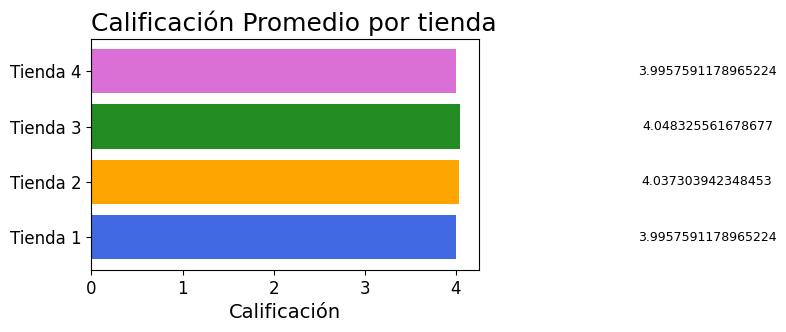

En cuanto a los productos con menor volumen de ventas, se observa que la Cuerda para saltar y el Cubo Mágico se posicionan como los artículos menos vendidos en las tiendas. Este comportamiento contrasta con el desempeño del iPhone 15, el cual se presenta como el producto más vendido de manera consistente en las cuatro tiendas analizadas.

A partir de estos resultados, se sugiere evaluar la implementación de acciones estratégicas para los productos con menor rotación. Entre las alternativas posibles se encuentra la promoción dirigida de estos artículos o, en caso de que no se observe una mejora significativa en su desempeño, considerar su reemplazo por productos con mayor valor percibido, que se ajusten mejor a las necesidades y preferencias de los clientes.

Este enfoque permitiría optimizar el portafolio de productos y concentrar los esfuerzos comerciales en aquellos artículos con mayor potencial de venta.

Finalmente, en relación con los costos de envío, se observa que las Tiendas 1 y 4 presentan los costos más bajos, mientras que la Tienda 2 registra el mayor costo de envío entre las cuatro. No obstante, resulta relevante destacar que, a pesar de contar con un mayor costo de envío, la Tienda 2 ha logrado mantener un nivel de ventas superior al de la Tienda 4.

Este comportamiento sugiere que el costo de envío o la ubicación geográfica no serían factores determinantes en el bajo nivel de facturación de la Tienda 4. En cambio, la diferencia en el desempeño podría estar asociada a otros elementos, tales como las categorías de productos comercializadas, las estrategias de promoción o el valor percibido por los clientes.

En consecuencia, el análisis indica que mejorar estos factores podría tener un impacto más significativo en la facturación de la Tienda 4 que una reducción adicional en los costos de envío.

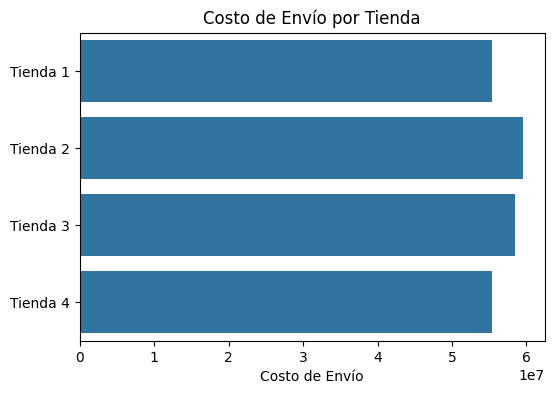

# Conclusión

En líneas generales, se recomienda vender la Tienda 4, ya que presenta la menor facturación en comparación con las demás tiendas, así como una de las calificaciones más bajas por parte de los clientes.

No obstante, como alternativa previa a la decisión final de vender la tienda, se sugiere realizar una investigación de mercado enfocada exclusivamente en los clientes atendidos por la Tienda 4. Esto se propone debido a que la tienda no presenta un nivel de ventas crítico, por lo que identificar las razones por las cuales su desempeño es inferior al de las demás podría permitir la implementación de medidas correctivas orientadas a mejorar su rendimiento.

Entre las acciones a evaluar se incluyen:

* Analizar la calidad de la atención al cliente y el seguimiento postventa.

* Ajustar el catálogo de productos, incrementando el inventario de las categorías con mayor rotación.

* Evaluar la eliminación o reducción de productos con bajo nivel de ventas.

* Analizar si la implementación de una estrategia de precios o promociones podría contribuir a mejorar la competitividad de la tienda.


En caso de que estas acciones no generen mejoras significativas en el desempeño, la venta de la Tienda 4 se mantendría como la opción más viable.